# **1.Know Your Data**

### Import Libraries

In [ ]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#preprocessing library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#model development library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [ ]:
#performance metrics library 
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Load Boston House Pricing Dataset

In [ ]:
#mouting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#load dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_df = pd.read_csv('/content/drive/MyDrive/housing.csv',header=None, delimiter=r"\s+", names=column_names)


### First View Of Dataset

In [ ]:
#first view of dataset
housing_df.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
#dataset columns
print(housing_df.columns.tolist())

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [ ]:
#rename the column
housing_df.rename(columns = {'MEDV':'Price'}, inplace = True)

In [ ]:
print(housing_df.columns.tolist())

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']


### Variable Decription

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
#Dataset Rows and Columns Count
print(housing_df.shape)

(506, 14)


In [ ]:
#dataset decribe
housing_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
#dataset information
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [ ]:
#checking duplicates value
print(housing_df.duplicated().value_counts())

False    506
dtype: int64


No dupicate value present in our dataset

In [ ]:
#checking missing values
print(housing_df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


No missing values are found in our dataset

In [ ]:
#checking number of unique values in each column
for i in housing_df.columns.tolist():
  print(f'Number of unique value in {i} is {housing_df[i].nunique()}.')

Number of unique value in CRIM is 504.
Number of unique value in ZN is 26.
Number of unique value in INDUS is 76.
Number of unique value in CHAS is 2.
Number of unique value in NOX is 81.
Number of unique value in RM is 446.
Number of unique value in AGE is 356.
Number of unique value in DIS is 412.
Number of unique value in RAD is 9.
Number of unique value in TAX is 66.
Number of unique value in PTRATIO is 46.
Number of unique value in B is 357.
Number of unique value in LSTAT is 455.
Number of unique value in MEDV is 229.


# **2.EDA**

## **Analyze Correaltion**

In [ ]:
#analyzing correlation
housing_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

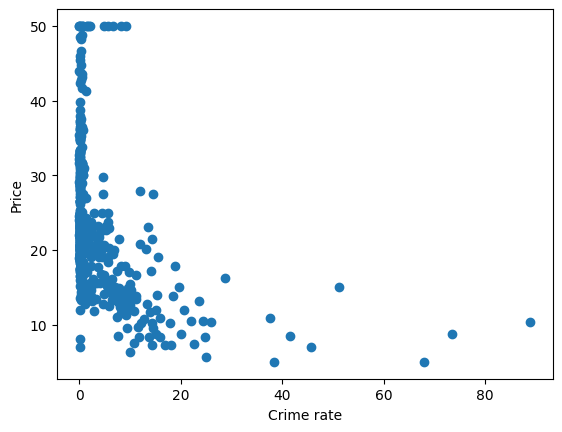

In [ ]:
#plot between crim and medv
plt.scatter(housing_df['CRIM'],housing_df['MEDV'])
plt.xlabel('Crime rate')
plt.ylabel('Price')

As we can see above graph,crime rate is increase ,house price is decread.
crime rate negatively impact the house price.

<Axes: xlabel='RM', ylabel='Price'>

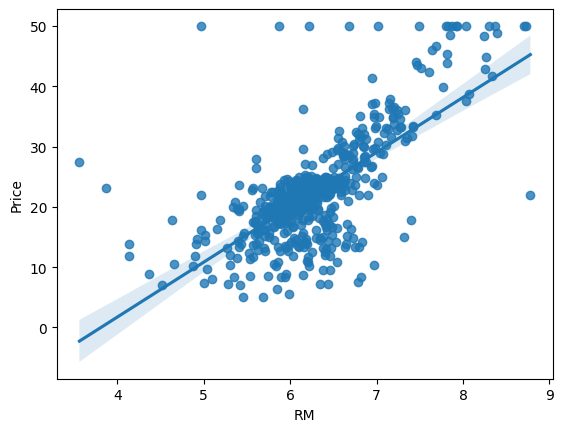

In [ ]:
sns.regplot(x='RM',y='Price',data=housing_df)

As we can see above graph,RM and price are positively correlated , increase the RM ,as a result increase in price of the house.

<Axes: xlabel='LSTAT', ylabel='Price'>

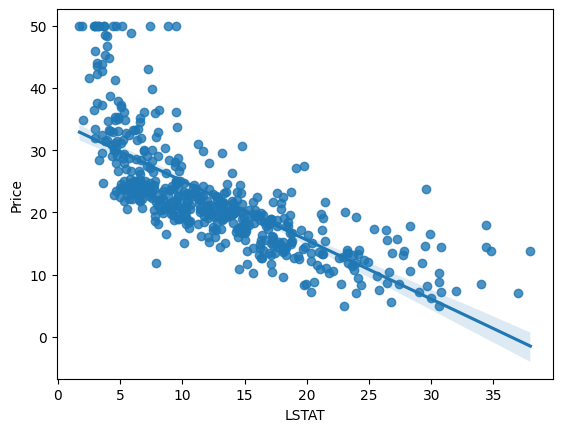

In [ ]:
#plot between LSTAT AND Price
sns.regplot(x="LSTAT",y="Price",data=housing_df)

As we can see above graph,Price and LSTAT are negatively correlated.So we conclude that population status is decreased,the price is increase.

<Axes: xlabel='PTRATIO', ylabel='Price'>

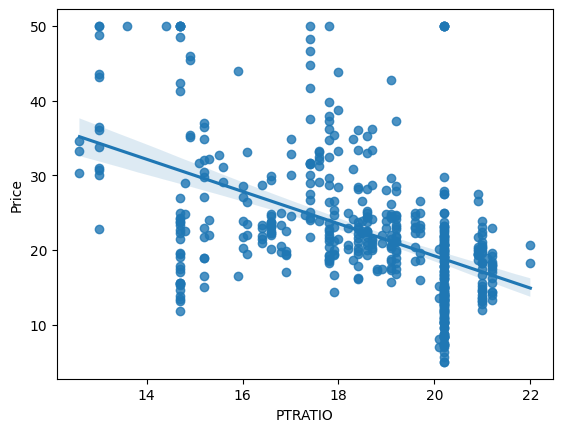

In [ ]:
#plot between PTRATIO AND Price
sns.regplot(x="PTRATIO",y="Price",data=housing_df)

As we can see above graph,as PTRATIO increases price is decreased.

# **3.Data Preprocessing**

In [ ]:
#Independent and Dependent Features
x = housing_df.iloc[:,:-1]
y = housing_df.iloc[:,-1]

In [ ]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#standardize the dataset
scalar = StandardScaler()

In [ ]:
#scale the train and test data
x_train  = scalar.fit_transform(x_train)
x_test =  scalar.transform(x_test)

In [ ]:
import pickle
pickle.dump(scalar,open('scaling.pkl','wb'))

In [ ]:
x_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [ ]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666.0,20.2,100.19,16.22


# **4.Model Training**

## **Regression Model**

In [ ]:
#intialize model
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predict result
y_pred_reg=regression.predict(x_test)

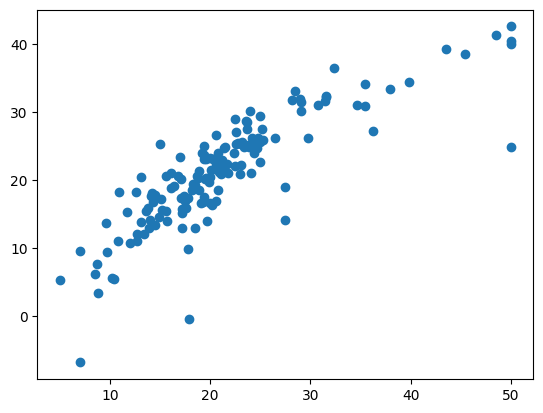

In [ ]:
#scatter plot for the prediction
plt.scatter(y_test,y_pred_reg)

In [ ]:
#get train and test score
print(regression.score(x_train,y_train))
print(regression.score(x_test,y_test))

0.7434997532004697
0.7112260057484932


In [ ]:
#model evalution
print(f'Mean Squared Error : {mean_absolute_error(y_test,y_pred_reg)}')
print(f'Mean Absolute Error:{mean_squared_error(y_test,y_pred_reg)}')
print(f'Root Mean Squared Error:{np.sqrt(mean_squared_error(y_test,y_pred_reg))}')
print(f'R2 Score: {r2_score(y_test,y_pred_reg)}')

Mean Squared Error : 3.1627098714574053
Mean Absolute Error:21.51744423117721
Root Mean Squared Error:4.6386899261728205
R2 Score: 0.7112260057484932


r2 score 0.71,so we try other model,for accurate prediction.

## **SVM MODEL**

In [ ]:
#intialize model
svm_model=SVR()

In [ ]:
#fit train data
svm_model.fit(x_train,y_train)

SVR()

In [ ]:
#predict result
y_pred_svr=svm_model.predict(x_test)

In [ ]:
#train and test score
print(svm_model.score(x_train,y_train))
print(svm_model.score(x_test,y_test))

0.6588538556440677
0.6516429887336646


In [ ]:
#r2_score between actual and predicted value
r2_score(y_test,y_pred_svr)

0.6516429887336646

No overfitting is detected,but accuracy is low as compared to LinearRegression.


## **KNN MODEL**

In [ ]:
#define model
model_knn = neighbors.KNeighborsRegressor()

In [ ]:
#fit train data
model_knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
#predict the result
y_pred_knn=model_knn.predict(x_test)

In [ ]:
#get train and test score
print(model_knn.score(x_train,y_train))
print(model_knn.score(x_test,y_test))

0.8486724539589108
0.7472251108326438


In [ ]:
#hyperparameter tuning
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

model_hy_knn = GridSearchCV(model_knn, params,cv=5)

In [ ]:
#fit train data
model_hy_knn.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20]})

In [ ]:
#predict the result
y_pred=model_hy_knn.predict(x_test)

In [ ]:
#get train and test score
print(model_hy_knn.score(x_train,y_train))
print(model_hy_knn.score(x_test,y_test))

0.9390200915537824
0.7886507149694169


In [ ]:
#r2_score before and after hyper-parameter tuning
print(r2_score(y_test,y_pred_knn))
print(r2_score(y_test,y_pred))

0.7472251108326438
0.7886507149694169


Overfitting is occur in KNN.Before and After applying hyper-parameter tuning.So we need to drop KNN model.

## **Decision Tree**

In [ ]:
#define model
dec_model=DecisionTreeRegressor(random_state = 42)

In [ ]:
#fit train data
dec_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#predict result
y_pred_dec = dec_model.predict(x_test)

In [ ]:
#get train and test data
print(dec_model.score(x_train,y_train))
print(dec_model.score(x_test,y_test))

1.0
0.8442008232392547


In [ ]:
#set hyper-parameters
params_dec = {
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter' : ['best','random'],
    'max_depth':[4,5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    "min_samples_split":[3,4,5,7]
    # "min_samples_leaf":[2,3]
}

In [ ]:
#hyper-parameter tuning 
model_hy_dec = GridSearchCV(dec_model, params_dec,cv=5)

In [ ]:
#fit train data
model_hy_dec.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 4, 5, 7],
                         'splitter': ['best', 'random']})

In [ ]:
#predict the result
y_pred_dec_hy=model_hy_dec.predict(x_test)

In [ ]:
#get train and test score
print(model_hy_dec.score(x_train,y_train))
print(model_hy_dec.score(x_test,y_test))

0.9307948673512426
0.7032062712346858


In [ ]:
#r2_score before and after hyper-parameter tuning
print(r2_score(y_test,y_pred_dec))
print(r2_score(y_test,y_pred_dec_hy))

0.8442008232392547
0.7032062712346858


Overfitting is occur in decision tree.Before and After applying hyper-parameter tuning.So we need to drop decision tree model.

### **So After,implemnting all the models and analyzing all the parameters,we conclude that,we need to move with Linear regression model.**

# **5.New Data Prediction**

In [ ]:
#reshape data
reshape_data=x_train[0].reshape(1,-1)

In [ ]:
#predict price
regression.predict(reshape_data)

array([25.28876411])

# **6.Picking The Model file For Deployment**

In [ ]:
#define pickle
import pickle

In [ ]:
#dump the pickle file
pickle.dump(regression,open('regmodel.pkl','wb'))

In [ ]:
#load the pickle file
pickl_model = pickle.load(open('regmodel.pkl','rb'))

In [ ]:
#predict the price with pickle_model
pickl_model.predict(reshape_data)

array([25.28876411])